In [1]:
import tensorflow as tf
import jax
import scipy as sc
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sbi
import numpyro
import corner

#fontsize
FS=18

Init Plugin
Init Graph Optimizer
Init Kernel


/usr/local/Caskroom/miniforge/base/envs/env_Fermilab/lib/python3.9/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")
print(tf.abs(-1))

GPU is available
tf.Tensor(1, shape=(), dtype=int32)Metal device set to: Apple M1



In [3]:
@jax.jit
def func(x):
    return jax.numpy.power(x,2)
print(jax.grad(func)(1.))

2.0


In [4]:
from sbi.examples.minimal import simple
posterior=simple()
print(posterior)

Running 500 simulations.:   0%|          | 0/500 [00:00<?, ?it/s]

Neural network successfully converged after 38 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

Posterior conditional density p(θ|x) (amortized).

This DirectPosterior-object was obtained with a SNPE-class method using a flow.
It allows to .sample() and .log_prob() the posterior and wraps the output of the .net to avoid leakage into regions with 0 prior probability.


In [5]:
sc.__version__

'1.8.0'

In [6]:
np.__version__

'1.19.5'

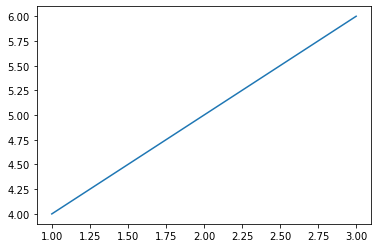

In [7]:
mpl.pyplot.plot([1,2,3],[4,5,6])

In [8]:
import numpyro.distributions as dist
from jax import random
from numpyro.infer import MCMC, NUTS

J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

# Eight Schools example
def eight_schools(J, sigma, y=None):
    mu = numpyro.sample('mu', dist.Normal(0, 5))
    tau = numpyro.sample('tau', dist.HalfCauchy(5))
    with numpyro.plate('J', J):
        theta = numpyro.sample('theta', dist.Normal(mu, tau))
        numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)
        
nuts_kernel = NUTS(eight_schools)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = random.PRNGKey(0)
mcmc.run(rng_key, J, sigma, y=y, extra_fields=('potential_energy',))

sample: 100%|██████████| 1500/1500 [00:01<00:00, 811.13it/s, 15 steps of size 1.58e-01. acc. prob=0.86]


In [9]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      4.28      3.04      4.25      0.03      9.80    158.41      1.00
       tau      3.86      2.84      3.05      0.61      7.92     88.13      1.05
  theta[0]      5.99      5.40      5.65     -2.71     13.99    241.25      1.02
  theta[1]      4.77      4.61      4.50     -3.08     11.74    255.97      1.00
  theta[2]      3.76      5.11      3.90     -4.06     11.57    309.05      1.00
  theta[3]      4.77      4.77      4.60     -2.43     12.06    342.46      1.01
  theta[4]      3.26      4.46      3.33     -3.94     10.01    313.35      1.00
  theta[5]      3.88      4.72      4.04     -3.48     11.06    365.47      1.00
  theta[6]      6.29      4.95      5.86     -0.69     14.85    190.26      1.03
  theta[7]      4.80      4.78      4.53     -2.75     12.19    322.84      1.00

Number of divergences: 34


In [10]:
pe = mcmc.get_extra_fields()['potential_energy']
print('Expected log joint density: {:.2f}'.format(np.mean(-pe)))

Expected log joint density: -54.68


In [11]:
samples_mcmc=mcmc.get_samples()

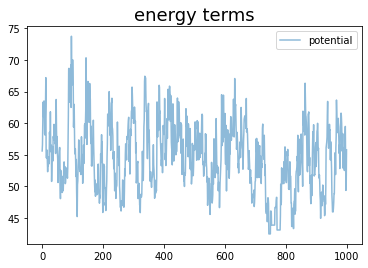

In [13]:
extra_fields=mcmc.get_extra_fields()


plt.title("energy terms", fontsize=FS)
plt.plot(extra_fields['potential_energy'], label="potential", alpha=0.5)
plt.legend()
